In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
  #  for filename in filenames:
       # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import modules

In [108]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings


In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print("Dataset is loaded")

Dataset is loaded


In [ ]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [111]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [112]:
##create a Dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label']=labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [113]:
df['label'].value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

Exploratory Data Analysis

In [114]:
print(df.info())
print(df.describe())
print(df['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   speech  5600 non-null   object
 1   label   5600 non-null   object
dtypes: object(2)
memory usage: 87.6+ KB
None
                                                   speech label
count                                                5600  5600
unique                                               5600     7
top     /kaggle/input/toronto-emotional-speech-set-tes...  fear
freq                                                    1   800
label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64


In [115]:
print(df.isnull().sum())

speech    0
label     0
dtype: int64


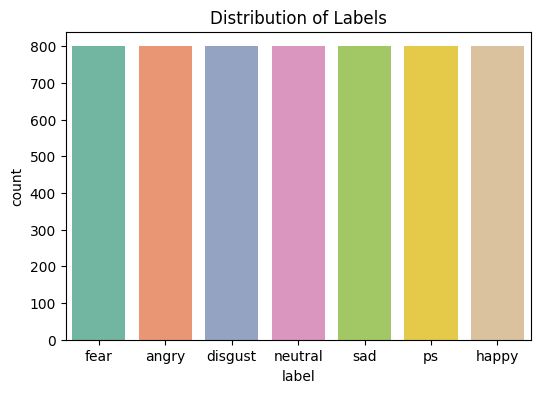

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(x='label',data=df,palette='Set2')
plt.title("Distribution of Labels")
plt.xlabel('label')
plt.ylabel('count')
plt.show()

In [118]:
import matplotlib.pyplot as plt
import librosa.display

In [119]:
data,sampling_rate = librosa.load(path)

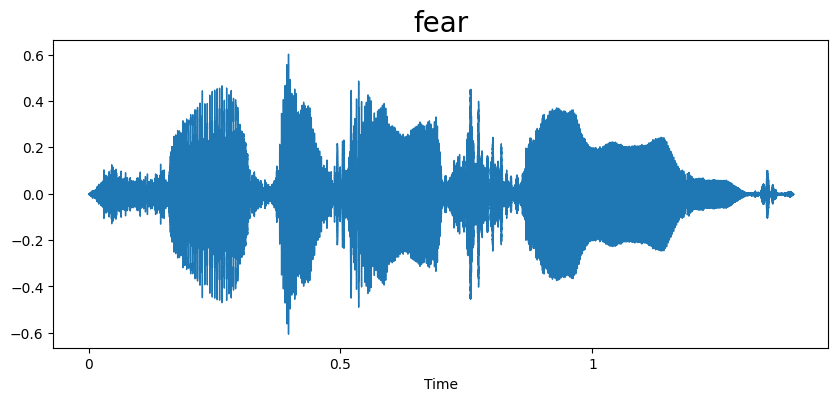

In [120]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
data,sampling_rate = librosa.load(path)
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
waveplot(data, sampling_rate,emotion)

In [121]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(f"waveform-{emotion}",size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()
    
def spectogram(data,sr,emotion):
    stft=librosa.stft(data)
    stft_db=librosa.amplitude_to_db(abs(stft))
    plt.figure(figsize=(10,4))
    plt.title(f"Spectrogram-{emotion}", size=20)
    librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()


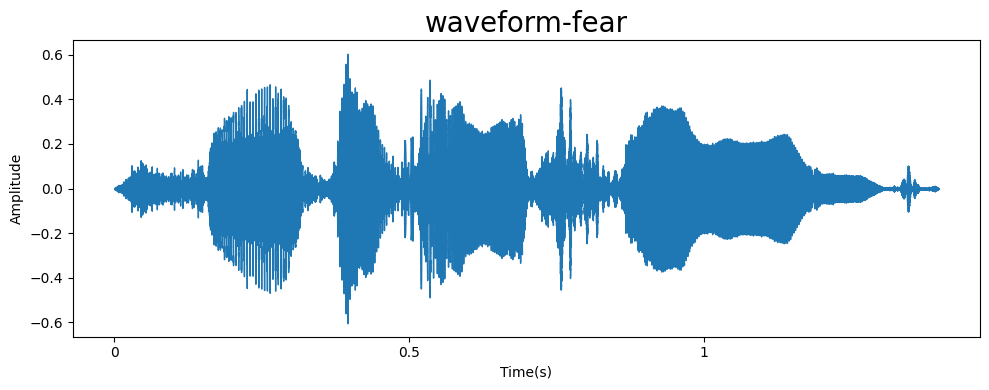

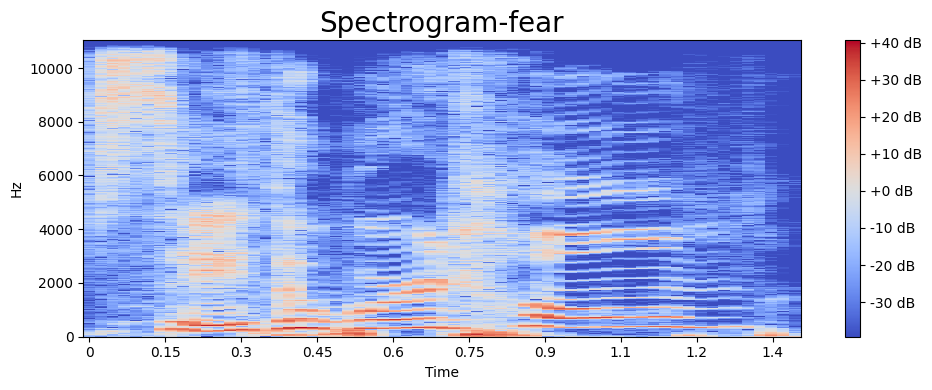

In [122]:
emotion='fear'
path=df['speech'][df['label']==emotion].iloc[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


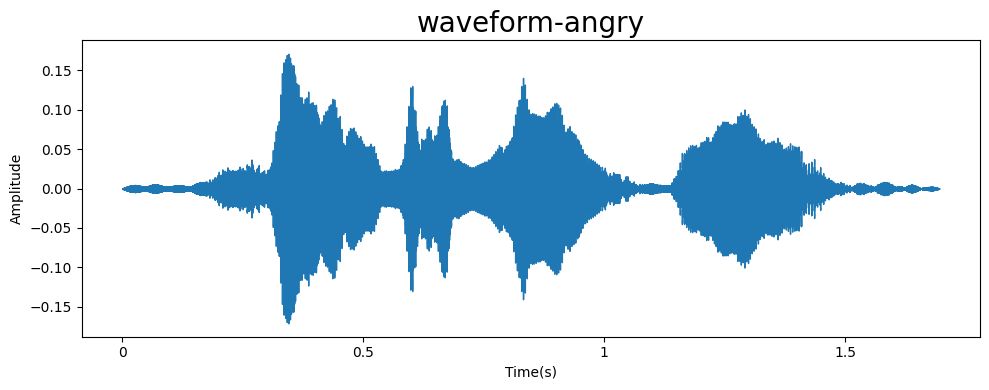

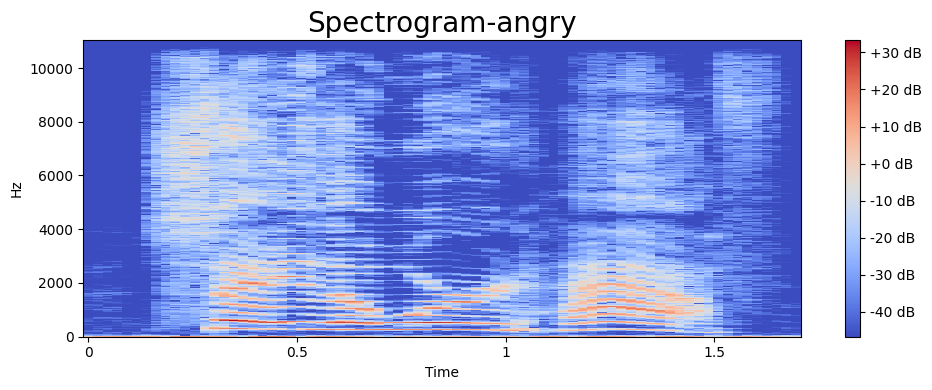

In [123]:
emotion='angry'
path=np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


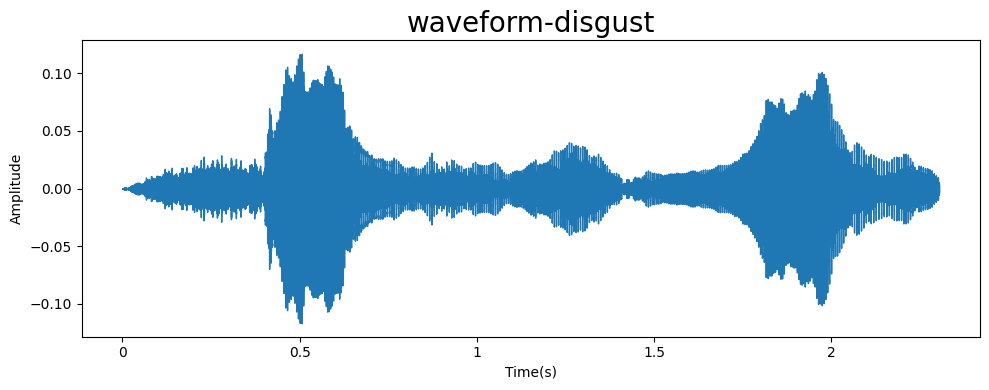

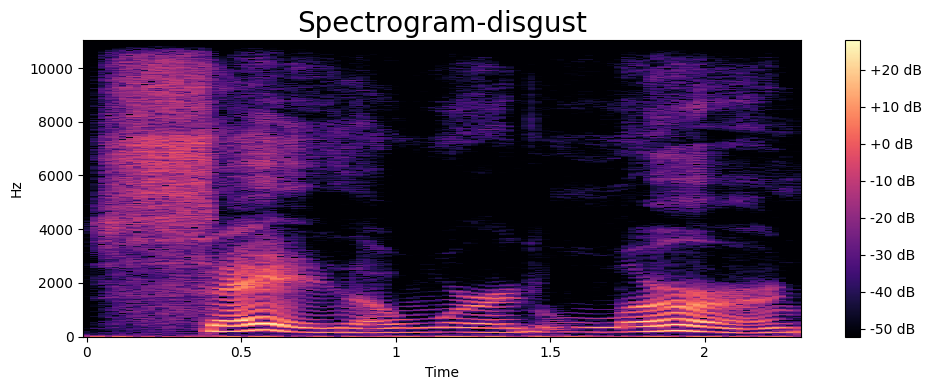

In [124]:
emotion='disgust'
path=np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


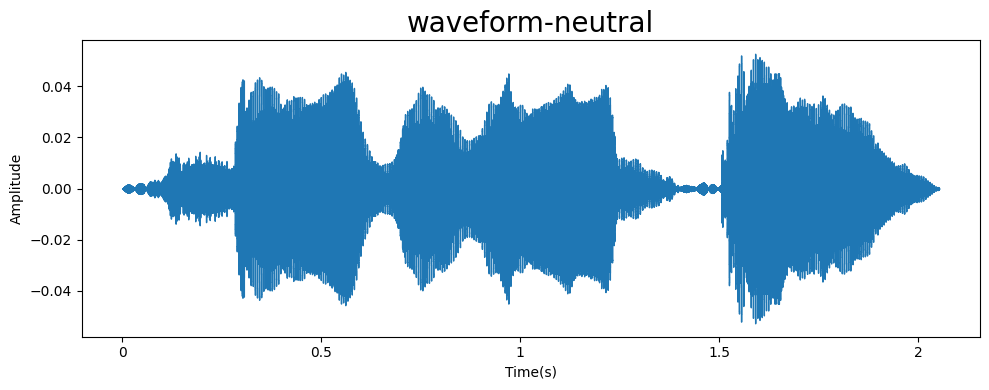

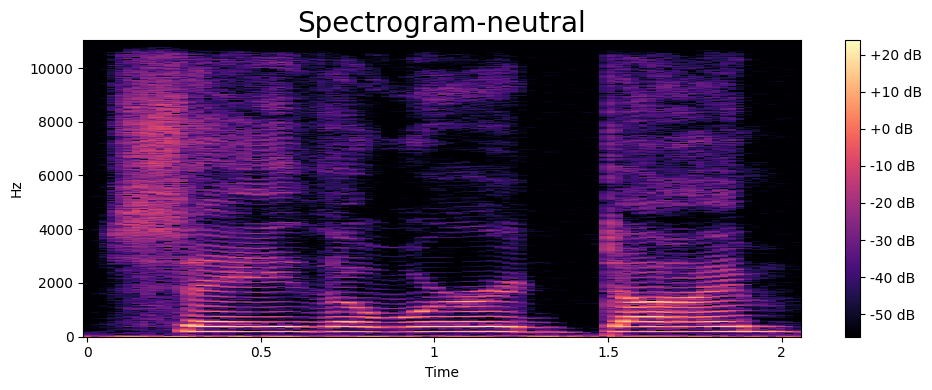

In [125]:
emotion='neutral'
path=np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

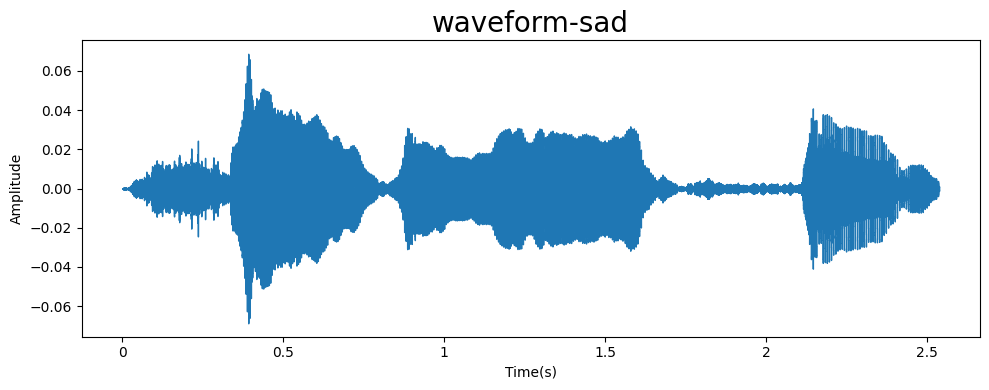

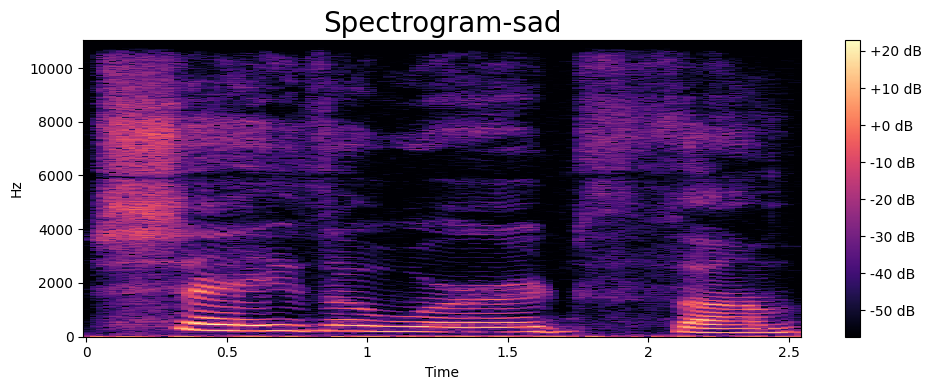

In [126]:
emotion='sad'
path=np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

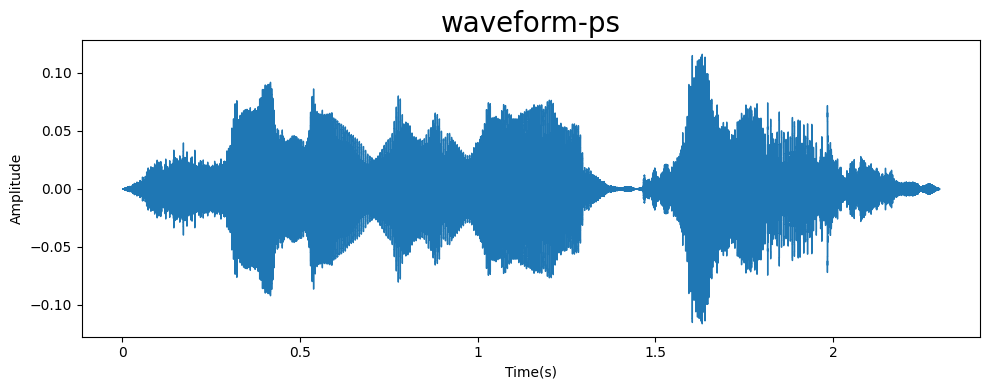

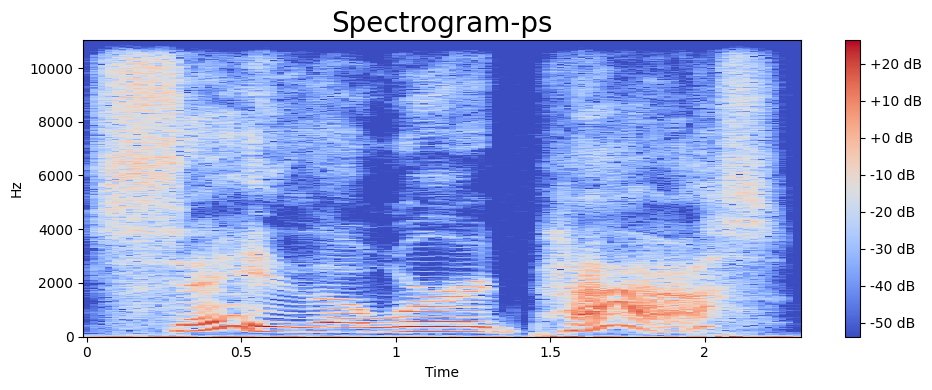

In [127]:
emotion='ps'
path=np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

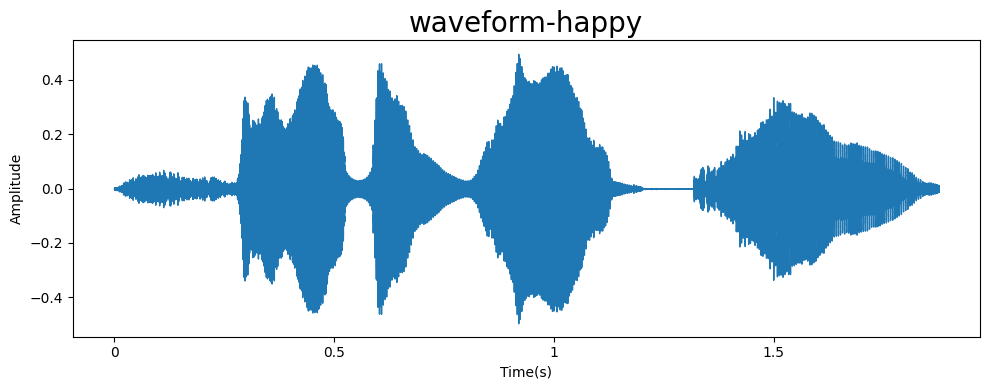

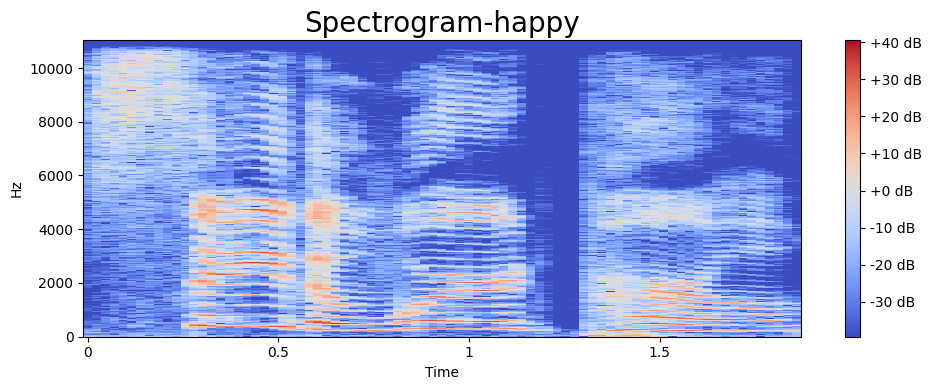

In [128]:
emotion='happy'
path=np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

##Feature Extraction


In [129]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [130]:
extract_mfcc(df['speech'][0])

array([-285.73727  ,   85.78295  ,   -2.1689112,   22.125532 ,
        -14.757396 ,   11.051346 ,   12.41245  ,   -3.000262 ,
          1.0844992,   11.078272 ,  -17.419659 ,   -8.093213 ,
          6.5879726,   -4.2209525,   -9.15508  ,    3.5214796,
        -13.186381 ,   14.078853 ,   19.66973  ,   22.725618 ,
         32.574635 ,   16.325033 ,   -3.8427296,    0.8962965,
        -11.239263 ,    6.653462 ,   -2.5883694,   -7.714016 ,
        -10.941657 ,   -2.4007545,   -5.2812867,    4.2711573,
        -11.202217 ,   -9.024621 ,   -3.6669843,    4.869744 ,
         -1.6027982,    2.5600514,   11.454374 ,   11.233449 ],
      dtype=float32)

In [132]:
X_mfcc=df['speech'].apply(lambda x:extract_mfcc(x))

KeyboardInterrupt: 

In [135]:
X_mfcc

0       [-285.73727, 85.78295, -2.1689112, 22.125532, ...
1       [-348.34332, 35.193233, -3.8413274, 14.658876,...
2       [-340.11435, 53.79644, -14.267782, 20.884027, ...
3       [-306.63422, 21.259705, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
5595    [-374.3952, 60.864998, 0.025058484, 8.431059, ...
5596    [-313.96478, 39.847843, -5.6493053, -3.8675754...
5597    [-357.54883, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.1474, 101.6839, -14.175897, -12.037376, ...
5599    [-389.4595, 54.042767, 1.3469975, -1.4258981, ...
Name: speech, Length: 5600, dtype: object

In [136]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(5600, 40)

In [137]:
##input split
X=np.expand_dims(X,-1)
X.shape


(5600, 40, 1)

In [140]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [146]:
y=y.toarray()

In [142]:
y.shape

(5600, 7)

Create the LSTM Model


In [147]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,051 (289.26 KB)

 Trainable params: 74,051 (289.26 KB)

 Non-trainable params: 0 (0.00 B)

In [144]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [148]:
##Train the model
history = model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.2685 - loss: 1.9035 - val_accuracy: 0.1000 - val_loss: 1.9549
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.5843 - loss: 1.5736 - val_accuracy: 0.1036 - val_loss: 1.9573
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - accuracy: 0.6447 - loss: 1.0968 - val_accuracy: 0.1705 - val_loss: 1.6744
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.7196 - loss: 0.7731 - val_accuracy: 0.4625 - val_loss: 1.1974
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.7815 - loss: 0.5970 - val_accuracy: 0.6170 - val_loss: 0.9539
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.8464 - loss: 0.4405 - val_accuracy: 0.7295 - val_loss: 0.6780
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.8713 - loss: 0.3631 - val_accuracy: 0.8330 - val_loss: 0.5093
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.9009 - loss: 0.2909 - val_accuracy: 0.8938 - v

Plot the Results

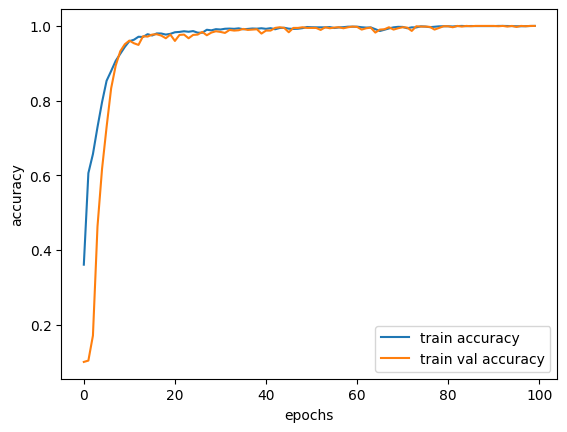

In [154]:
epochs=list(range(100))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='train val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

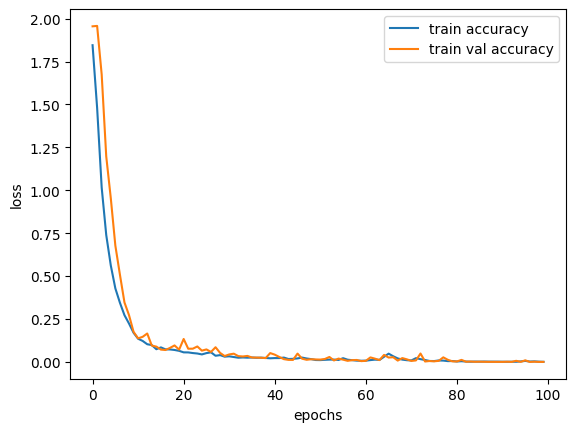

In [155]:
epochs=list(range(100))
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(epochs,loss,label='train accuracy')
plt.plot(epochs,val_loss,label='train val accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()